# HW4 - Linear Regression 

## Question 1: 

Import Libraries and load the CSV file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
rand_state = 1000

Let's read in the data set nyc-rolling-sales_clean.csv. 

In [3]:
df = pd.read_csv ('nyc-rolling-sales_clean.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


### **1. EDA - changing the type of a few feature variables**

Let's make sure the datatypes are all right. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

It looks like some of the data are objects. We need to change them to be categorical instead. 

In [5]:
categorical = ["BOROUGH", 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']

for col in categorical: 
    df[col]=df[col].astype("category")
    

df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  int64   
 6   RESIDENTIAL UNITS               30236 non-null  int64   
 7   COMMERCIAL UNITS                30236 non-null  int64   
 8   TOTAL UNITS                     30236 non-null  int64   
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  int64   
 12  TAX CLASS AT TIME 

It looks good! The data types we wanted to change are now categorical. 

### **2. Define target variable as log(price)**

Let's create a column for logprice and add it to the dataframe.

In [6]:
df['logprice'] = np.log(df['SALE PRICE'])

Using log(SALE PRICE) instead of just SALE PRICE will boost the performance of the linear model, because we expect to see decreasing returns to scale. We expect price to increase at a decreasing rate. 

### **3. Change categorical variables to dummmy variables**

Let's change all the categorical variables to dummy variables, or else we woun't be able to use them in the model.

In [7]:
df = pd.get_dummies(df, columns = categorical, drop_first=True)

### **4. Define the feature space and set the target variable**

Now let's assign logprice as the target variable and define the feature space...

In [8]:
y = df['logprice']
X = df.drop(['logprice','SALE PRICE'], axis=1 )

... and see how many features there are in the feature space. 

In [9]:
df.describe()

,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,sale_year,...,SALE DATE_2017-08-21,SALE DATE_2017-08-22,SALE DATE_2017-08-23,SALE DATE_2017-08-24,SALE DATE_2017-08-25,SALE DATE_2017-08-26,SALE DATE_2017-08-28,SALE DATE_2017-08-29,SALE DATE_2017-08-30,SALE DATE_2017-08-31
count,30236.000000,30236.000000,30236.000000,30236.000000,3.023600e+04,3.023600e+04,30236.000000,30236.000000,3.023600e+04,30236.000000,...,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000,30236.000000
mean,11034.538365,1.970532,0.173039,2.147804,3.133582e+03,2.440363e+03,1946.632160,1.249768,7.938200e+05,2016.649623,...,0.002679,0.002844,0.002480,0.002514,0.001819,0.000033,0.001753,0.001753,0.001521,0.000992
std,480.032918,12.586963,13.034598,18.198705,2.796632e+04,2.380024e+04,35.033054,0.632240,5.947252e+05,0.477096,...,0.051690,0.053257,0.049744,0.050073,0.042612,0.005751,0.041831,0.041831,0.038976,0.031484
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,1.000100e+04,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10468.000000,1.000000,0.000000,1.000000,1.816500e+03,1.208000e+03,1920.000000,1.000000,4.360000e+05,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11221.000000,1.000000,0.000000,1.000000,2.417000e+03,1.680000e+03,1935.000000,1.000000,6.300000e+05,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11368.000000,2.000000,0.000000,2.000000,3.500000e+03,2.392000e+03,1970.000000,1.000000,9.400000e+05,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,3.995000e+06,2017.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Wow! There are 856 features in X!

### **5. Split the data into test and train set** 

Let's split the data into the test (30%) and the train set (70%). 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.7

In [11]:
X_test.head()

,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,sale_year,sale_month,...,SALE DATE_2017-08-21,SALE DATE_2017-08-22,SALE DATE_2017-08-23,SALE DATE_2017-08-24,SALE DATE_2017-08-25,SALE DATE_2017-08-26,SALE DATE_2017-08-28,SALE DATE_2017-08-29,SALE DATE_2017-08-30,SALE DATE_2017-08-31
3767,11228,2,0,2,2425.0,3601.0,1935,1,2017,6,...,0,0,0,0,0,0,0,0,0,0
24270,11434,2,0,2,2272.0,2100.0,2006,1,2017,3,...,0,0,0,0,0,0,0,0,0,0
27718,10305,2,0,2,3572.0,1718.0,1970,1,2017,3,...,0,0,0,0,0,0,0,0,0,0
6232,11212,4,0,4,2500.0,3116.0,1930,2,2016,9,...,0,0,0,0,0,0,0,0,0,0
11161,11218,2,0,2,2525.0,2000.0,1920,1,2017,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train.head()

,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,sale_year,sale_month,...,SALE DATE_2017-08-21,SALE DATE_2017-08-22,SALE DATE_2017-08-23,SALE DATE_2017-08-24,SALE DATE_2017-08-25,SALE DATE_2017-08-26,SALE DATE_2017-08-28,SALE DATE_2017-08-29,SALE DATE_2017-08-30,SALE DATE_2017-08-31
27919,10306,1,0,1,4000.0,1105.0,1945,1,2017,2,...,0,0,0,0,0,0,0,0,0,0
26034,10301,1,0,1,3918.0,1700.0,1992,1,2016,9,...,0,0,0,0,0,0,0,0,0,0
27154,10306,2,0,2,4000.0,2012.0,1965,1,2017,6,...,0,0,0,0,0,0,0,0,0,0
13684,11220,2,0,2,2003.0,2532.0,1910,1,2017,6,...,0,0,0,0,0,0,0,0,0,0
28389,10309,1,0,1,2938.0,1632.0,2003,1,2017,3,...,0,0,0,0,0,0,0,0,0,0


### **6. Train the Model**

Now, we use the train data to train the model using Linear Regression. 

In [13]:
reg_model = LinearRegression()

In [14]:
reg_model.fit(X_train, y_train)

LinearRegression()

Alright! Our model is trained!

**1) Save the predicted values for the test set as "y_hat_test"**

In [15]:
y_hat_test = reg_model.predict(X_test) 

**2) Construct a data frame named log_predictions**

In [16]:
log_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,actuals,predictions,resid
3767,14.077875,13.702008,0.375866
24270,13.199324,12.974417,0.224907
27718,13.384728,13.148423,0.236305
6232,12.873902,13.113878,-0.239976
11161,13.710150,14.011840,-0.301690


This shows us the predictions, actuals and residuals. 

**3) Report the RMSE_test**

In order to calculate the RMSE_test, we first need to find the MSE. 

In [17]:
MSE_test = np.mean(np.square(log_predictions['resid']))
np.round(MSE_test,3)

184366780.107

Now we can use the MSE to find the RMSE. 

In [18]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

13578.173

The RMSE_test is **0.335**

### **7. Estimate the RMSE_test using K-Fold Cross Validation**

Let's estimate the RMSE using K-Fold Cross Validation using k = 5 and k = 10. 

In [19]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [20]:
my_estimator = LinearRegression()

**1) Cross Validation using k = 5**

In [21]:
MSE = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
MSE

array([5.29164038e+08, 2.26868276e+09, 1.88681320e+06, 3.74481709e+09,
       2.60748851e+08])

In [22]:
MSE_5 = np.mean(MSE)
np.round(MSE_5,3)

1361059909.715

In [23]:
RMSE = np.sqrt(MSE)
RMSE

array([23003.5657744 , 47630.69136925,  1373.6131906 , 61194.91062348,
       16147.71966905])

In [24]:
RMSE_5 = np.mean(RMSE)
np.round(RMSE_5,3)

29870.1

**2) Cross Validation using k = 10**

In [25]:
MSE = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE

array([7.56728092e+08, 1.05703061e+09, 5.11642599e+08, 6.43380704e+09,
       9.92084025e+07, 2.70304347e+07, 2.93591161e+08, 4.23766452e+09,
       5.76571966e+09, 4.60848918e+09])

In [26]:
MSE_10 = np.mean(MSE)
np.round(MSE_10,3)

2379091169.464

In [27]:
RMSE = np.sqrt(MSE)
RMSE

array([27508.69120657, 32512.00716086, 22619.51809589, 80211.01570786,
        9960.34148562,  5199.08017609, 17134.50205759, 65097.3465085 ,
       75932.33603948, 67885.85402372])

In [28]:
RMSE_10 = np.mean(RMSE)
np.round(RMSE_10,3)

40406.069

### 8. Compare RMSE_CV with RMSE_test from part 3 and explain your observation

RMSE_CV equals about 4.74 and the RMSE_test equals about 0.335. The RMSE is smaller in the train set than in the version using cross validation. This is to be expected, because... 

# Question 2: 

In [29]:
df_poly = pd.read_csv ('boston_polynomial.csv')

### 1. Define x and y and create a scatterplott

In [30]:
x = np.array(df_poly['LSTAT'])
y = np.array(df_poly['price'])

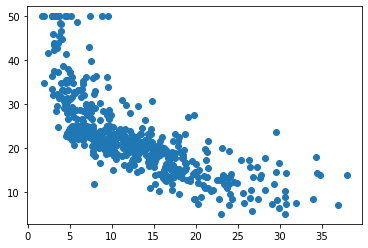

In [31]:
plt.scatter(x,y)

### 2. Use PolynomialFeatures to fit and transform the data to a polynomial model

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree =5)

In [34]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


### 3. Split the data into test and train set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [36]:
X_train.head()

,0,1,2,3,4,5
463,1.0,10.29,105.8841,1089.547389,11211.442633,1.153657e+05
75,1.0,8.94,79.9236,714.516984,6387.781837,5.710677e+04
478,1.0,18.03,325.0809,5861.208627,105677.591545,1.905367e+06
199,1.0,4.56,20.7936,94.818816,432.373801,1.971625e+03
84,1.0,9.62,92.5444,890.277128,8564.465971,8.239016e+04


### 4. Use LinearRegression() to train the model

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**1) Save the predicted values for the test set as "y_hat_test"**

In [38]:
y_hat_test = model.predict(X_test)

**2) Construct a data frame named predictions**

In [39]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
df_predictions.head()

,y_test,y_hat_test,resid
0,34.6,27.114768,7.485232
1,31.5,37.217467,-5.717467
2,20.6,23.184036,-2.584036
3,14.5,20.155145,-5.655145
4,16.2,21.151035,-4.951035


**3) Report the RMSE_test**

In [40]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

37.821

In [41]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

6.15

The RMSE for the test set is 6.15. 

### 5. Use K-Fold Cross Validation to estimate the RMSE

In [42]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [43]:
model = LinearRegression()

In [44]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )

In [45]:
MSE_CV= np.mean(-NMSE)
MSE_CV

23.144965329082808

In [46]:
RMSE_CV5 = np.sqrt(-NMSE).mean()
RMSE_CV5

4.737550846849848

The RMSE_test using 5 fold cross validation is 4.737

### 6. Using my_polynomial_regression() function from notebook for class 7

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test


In [48]:
returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


### 7. Plot the RMSE_test and RMSE_train against the Degree

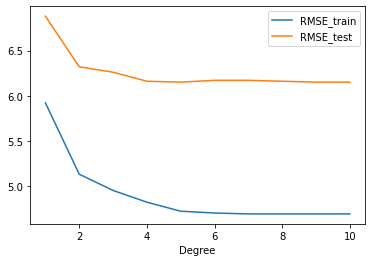

In [49]:
output.set_index('Degree').plot()
plt.show()

### 8. Optimal Polynomial Degree

Based off of the table in part 6 and the graph in part 7, I would say that the optimal polynomial degree is 4, because this is where the test set reaches it's lowest RMSE. However, one could also argue that the model is optimal at degree 3, because the difference between the RMES_test at degree 3 vs 4 is negligable, and a simpler model (degree 3) is often prefered to a more complex model (degree 4). 

In [50]:
!jupyter nbconvert --to html HW2.ipynb

[NbConvertApp] WARNING | pattern 'HW2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute